### Import the dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
true = pd.read_csv("True.csv")
fake = pd.read_csv("Fake.csv")

In [3]:
true['is_fake'] = 0
fake['is_fake'] = 1

In [4]:
news = pd.concat([true,fake], ignore_index=True)

In [5]:
news.drop(['title', 'date', 'subject'], axis=1, inplace=True)

### Text Cleaning 

In [6]:
import re
import nltk

from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

In [7]:
# donwload the stopwords
nltk.download('stopwords')

# Download the POS tagger data package (required for lemmatization)
nltk.download('averaged_perceptron_tagger')

# Download the WordNet dataset (required for lemmatization)
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Zeus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Zeus\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Zeus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
# Create a WordNetLemmatizer object
lemmatizer = WordNetLemmatizer()

# Create the english stop words list
english_stop_words = stopwords.words('english')

#### 1) remove non alphabetical character such as digits, punctuations and special characters

In [9]:
def remove_non_alphabetic_characters(text):
    regex = re.compile('[^a-zA-Z ]')
    return regex.sub('', text)

#### 2) normlize the text to lowercase

In [10]:
def lowercase(text):
    return text.lower()

#### 3) tokenize the text: split the text into a list of tokens (the words that make up the text)

In [11]:
def tokenize(text):
    tokens = re.split("\W+",text) 
    return tokens

#### 4) remove the stop words from the text

In [12]:
def remove_stopwords(text):
    text= [word for word in text if word not in english_stop_words and word != '']
    return text

#### 5) lemmatize the text: convert each token into it's proper lemma 

In [13]:
def proper_pos_tag(tag):
     # Map POS tag to WordNet POS tag
    tag = tag[0].upper()
    tag_dict = {"J": nltk.corpus.wordnet.ADJ,
                "N": nltk.corpus.wordnet.NOUN,
                "V": nltk.corpus.wordnet.VERB,
                "R": nltk.corpus.wordnet.ADV}
    return tag_dict.get(tag, nltk.corpus.wordnet.NOUN)  # Default to noun if not found


def lemmatize(tokens):
    pos_tagged_tokens = nltk.pos_tag(tokens)
    
    proper_pos_tagged_tokens = [(token, proper_pos_tag(tag)) for token, tag in pos_tagged_tokens]
    
    lemmatized_tokens = [lemmatizer.lemmatize(token, pos_tag) for token, pos_tag in proper_pos_tagged_tokens]
    return lemmatized_tokens

#### execute steps (1) to (5) in order to clean and preprocess the text

In [14]:
def clean(text):
    text = remove_non_alphabetic_characters(text)
    text = lowercase(text)
    tokens = tokenize(text)
    tokens = remove_stopwords(tokens)
#     tokens = lemmatize(tokens)
    return tokens

In [15]:
news['cleaned_text'] = news['text'].apply(lambda text: clean(text))

### EDA 

In [19]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

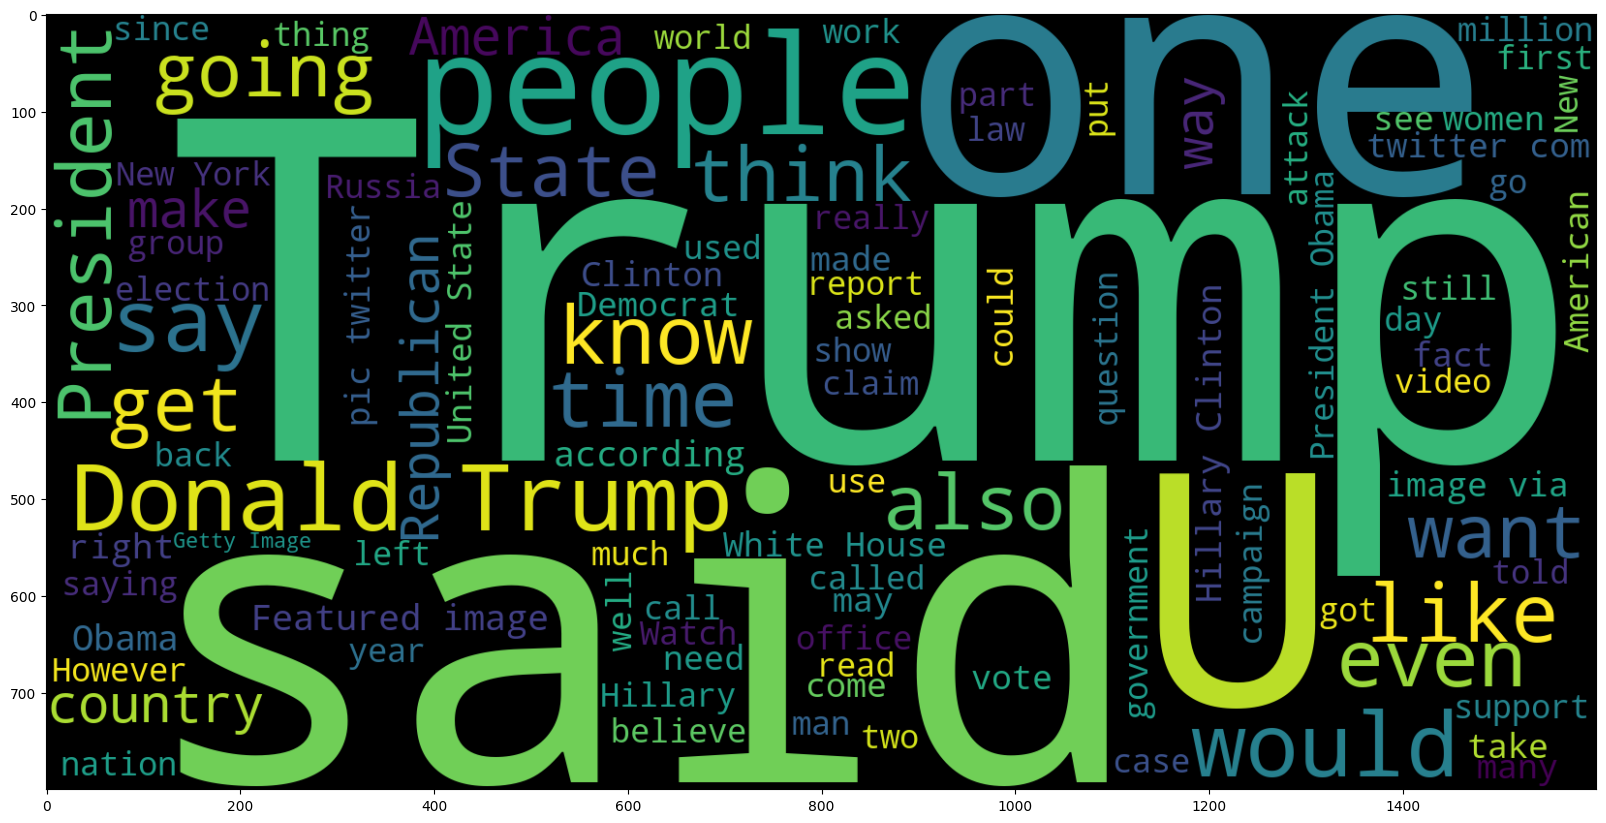

In [227]:
wordcloud = WordCloud(max_words = 100 , width = 1600 , height = 800, stopwords = english_stop_words).generate(" ".join(news[news.is_fake == 1].text))
plt.figure(figsize=(20, 20))
plt.imshow(wordcloud, interpolation='bilinear')

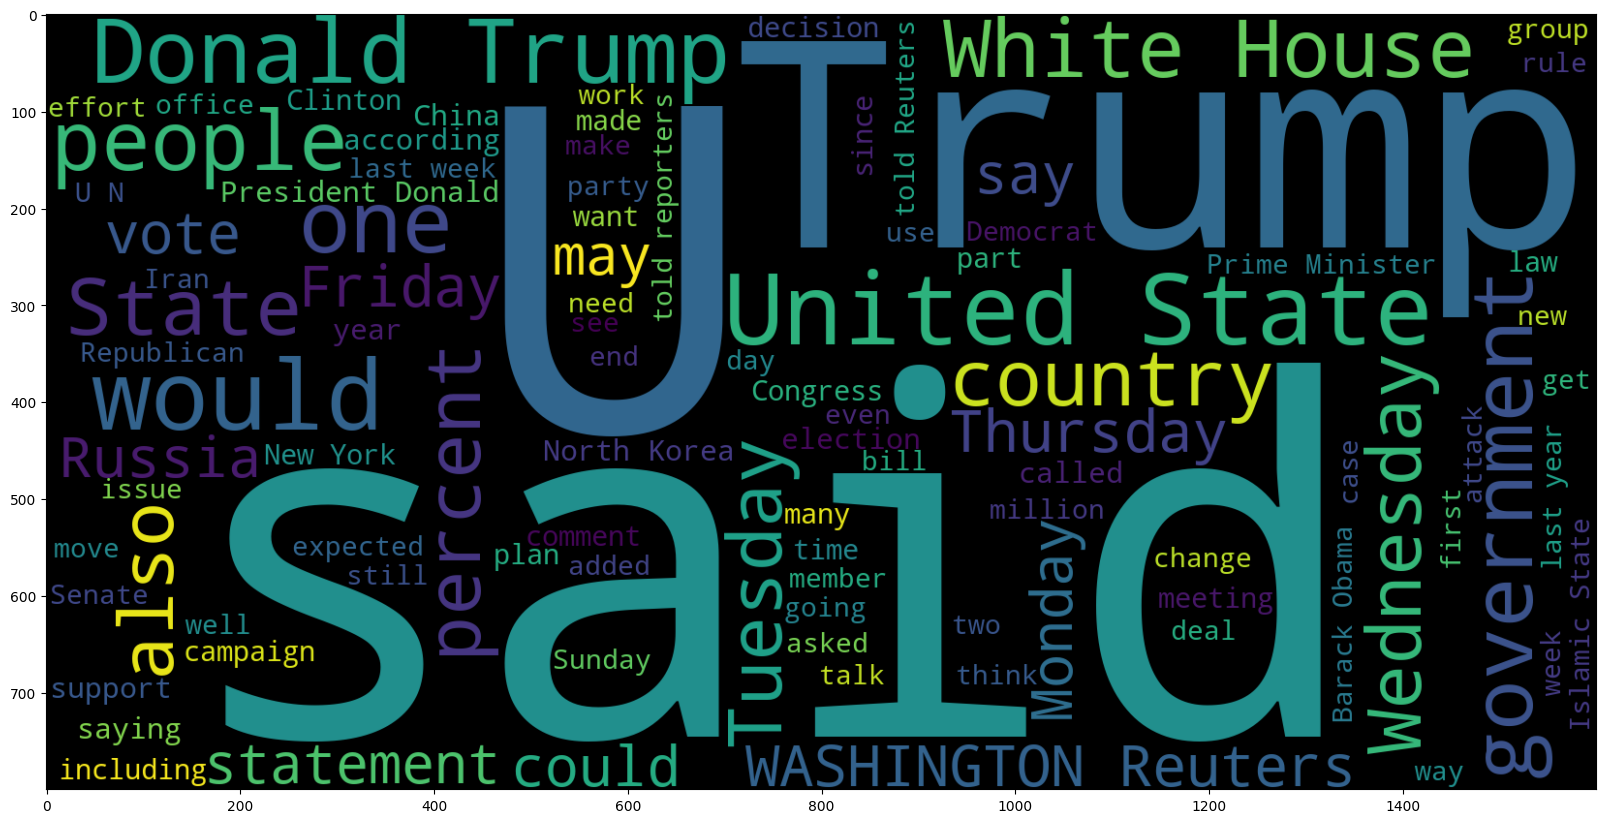

In [228]:
wordcloud = WordCloud(max_words = 100 , width = 1600 , height = 800, stopwords = english_stop_words).generate(" ".join(news[news.is_fake == 0].text))
plt.figure(figsize=(20, 20))
plt.imshow(wordcloud, interpolation='bilinear')

In [229]:
fake_tokens = []
for tokens in news[news.is_fake == 1]['cleaned_text']:
    fake_tokens.extend(tokens)

In [230]:
from collections import Counter
counter = Counter(fake_tokens)
most_common = counter.most_common(20)
most_common = dict(most_common)
most_common

{'trump': 73933,
 'said': 31013,
 'people': 25963,
 'president': 25586,
 'would': 23427,
 'one': 22935,
 'us': 22049,
 'clinton': 18011,
 'obama': 17813,
 'like': 17621,
 'donald': 17215,
 'also': 15242,
 'new': 14158,
 'news': 14126,
 'even': 13717,
 'hillary': 13565,
 'white': 12778,
 'time': 12728,
 'state': 12525,
 'via': 11273}

In [231]:
true_tokens = []
for tokens in news[news.is_fake == 0]['cleaned_text']:
    true_tokens.extend(tokens)

In [232]:
from collections import Counter
counter = Counter(true_tokens)
most_common = counter.most_common(20)
most_common = dict(most_common)
most_common

{'said': 98985,
 'trump': 42577,
 'us': 41137,
 'would': 31514,
 'reuters': 28306,
 'president': 25533,
 'state': 18753,
 'government': 17976,
 'states': 17634,
 'new': 16785,
 'house': 16405,
 'also': 15944,
 'united': 15572,
 'republican': 15288,
 'people': 15111,
 'told': 14242,
 'could': 13697,
 'one': 12674,
 'last': 12613,
 'washington': 12140}

In [233]:
news['char_count'] = news['cleaned_text'].apply(lambda tokens: sum(len(token) for token in tokens))

In [234]:
import scipy.stats as stats

true_char_count = news[news.is_fake == 0].char_count.values
mean1 = np.mean(true_char_count)
std_dev1 = np.std(true_char_count)

fake_char_count = news[news.is_fake == 1].char_count.values
mean2 = np.mean(fake_char_count)
std_dev2 = np.std(fake_char_count)

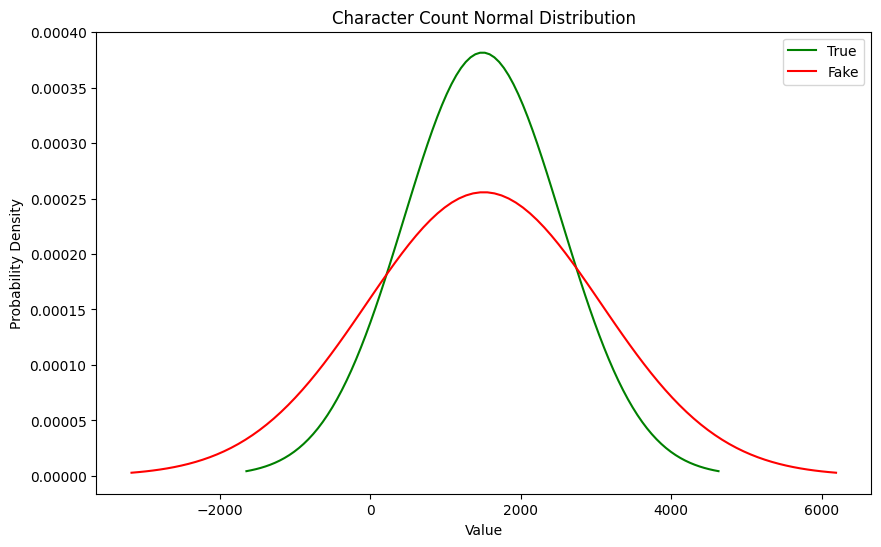

In [235]:
# Generate data points for the first normal distribution curve using mean1 and std_dev1
x1 = np.linspace(mean1 - 3 * std_dev1, mean1 + 3 * std_dev1, 100)
y1 = stats.norm.pdf(x1, mean1, std_dev1)

# Generate data points for the second normal distribution curve using mean2 and std_dev2
x2 = np.linspace(mean2 - 3 * std_dev2, mean2 + 3 * std_dev2, 100)
y2 = stats.norm.pdf(x2, mean2, std_dev2)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x1, y1, color='green', label='True')
plt.plot(x2, y2, color='red', label='Fake')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Character Count Normal Distribution')
plt.legend()

# Show the plot
plt.show()

In [236]:
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import norm

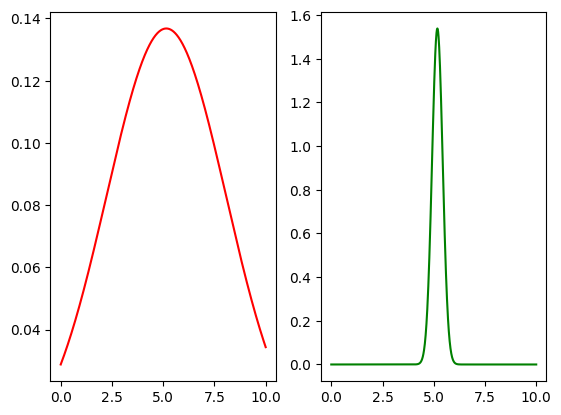

In [237]:
fig, axes = plt.subplots(nrows=1, ncols=2)

fake = news[news['is_fake']==1]['text'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))
mean = np.mean(fake)
std = np.std(fake)
domain = np.linspace(0,10,1000)
axes[0].plot(domain, norm.pdf(domain, mean, std), color='red')

true = news[news['is_fake']==0]['text'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))
mean = np.mean(true)
std = np.std(true)
domain = np.linspace(0,10,1000)
axes[1].plot(domain, norm.pdf(domain, mean, std), color='green')

plt.show()

In [59]:
from sklearn.model_selection import train_test_split

In [92]:
# Split the data into training (60%), validation (20%), and test (20%) sets
x_train, x_test, y_train, y_test = train_test_split(news.text, news.is_fake, test_size=0.2, random_state=42)

### Text Vectorization

In [61]:
from sklearn.feature_extraction.text import CountVectorizer

In [62]:
cv = CountVectorizer()

In [63]:
x_train = cv.fit_transform(x_train)

In [64]:
x_test = cv.transform(x_test)

### Training the logistic regression model

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [35]:
# Step 1: Define Hyperparameter Grid
grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['lbfgs', 'liblinear', 'saga'],
}

In [65]:
# Step 2: Instantiate Logistic Regression Model
logreg = LogisticRegression()

In [37]:
# Step 3: Instantiate GridSearchCV
grid_search = GridSearchCV(logreg, grid, cv=5, verbose=10)

In [38]:
# Step 4: Fit the GridSearchCV
grid_search.fit(x_val, y_val)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5; 1/30] START C=0.01, penalty=l1, solver=lbfgs...........................
[CV 1/5; 1/30] END C=0.01, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5; 1/30] START C=0.01, penalty=l1, solver=lbfgs...........................
[CV 2/5; 1/30] END C=0.01, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5; 1/30] START C=0.01, penalty=l1, solver=lbfgs...........................
[CV 3/5; 1/30] END C=0.01, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5; 1/30] START C=0.01, penalty=l1, solver=lbfgs...........................
[CV 4/5; 1/30] END C=0.01, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5; 1/30] START C=0.01, penalty=l1, solver=lbfgs...........................
[CV 5/5; 1/30] END C=0.01, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5; 2/30] START C=0.01, penalty=l1, solver=liblinear.......................
[CV 1/5; 2/30] END C=0.01, penalty=l1

C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 3/30] END C=0.01, penalty=l1, solver=saga;, score=0.951 total time=   6.1s
[CV 2/5; 3/30] START C=0.01, penalty=l1, solver=saga............................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 3/30] END C=0.01, penalty=l1, solver=saga;, score=0.948 total time=   4.2s
[CV 3/5; 3/30] START C=0.01, penalty=l1, solver=saga............................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5; 3/30] END C=0.01, penalty=l1, solver=saga;, score=0.942 total time=   3.5s
[CV 4/5; 3/30] START C=0.01, penalty=l1, solver=saga............................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5; 3/30] END C=0.01, penalty=l1, solver=saga;, score=0.956 total time=   3.7s
[CV 5/5; 3/30] START C=0.01, penalty=l1, solver=saga............................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5; 3/30] END C=0.01, penalty=l1, solver=saga;, score=0.943 total time=   3.8s
[CV 1/5; 4/30] START C=0.01, penalty=l2, solver=lbfgs...........................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5; 4/30] END C=0.01, penalty=l2, solver=lbfgs;, score=0.987 total time=   1.4s
[CV 2/5; 4/30] START C=0.01, penalty=l2, solver=lbfgs...........................
[CV 2/5; 4/30] END C=0.01, penalty=l2, solver=lbfgs;, score=0.991 total time=   0.9s
[CV 3/5; 4/30] START C=0.01, penalty=l2, solver=lbfgs...........................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5; 4/30] END C=0.01, penalty=l2, solver=lbfgs;, score=0.982 total time=   1.4s
[CV 4/5; 4/30] START C=0.01, penalty=l2, solver=lbfgs...........................
[CV 4/5; 4/30] END C=0.01, penalty=l2, solver=lbfgs;, score=0.988 total time=   1.0s
[CV 5/5; 4/30] START C=0.01, penalty=l2, solver=lbfgs...........................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5; 4/30] END C=0.01, penalty=l2, solver=lbfgs;, score=0.987 total time=   1.4s
[CV 1/5; 5/30] START C=0.01, penalty=l2, solver=liblinear.......................
[CV 1/5; 5/30] END C=0.01, penalty=l2, solver=liblinear;, score=0.986 total time=   0.7s
[CV 2/5; 5/30] START C=0.01, penalty=l2, solver=liblinear.......................
[CV 2/5; 5/30] END C=0.01, penalty=l2, solver=liblinear;, score=0.991 total time=   0.5s
[CV 3/5; 5/30] START C=0.01, penalty=l2, solver=liblinear.......................
[CV 3/5; 5/30] END C=0.01, penalty=l2, solver=liblinear;, score=0.982 total time=   0.8s
[CV 4/5; 5/30] START C=0.01, penalty=l2, solver=liblinear.......................
[CV 4/5; 5/30] END C=0.01, penalty=l2, solver=liblinear;, score=0.988 total time=   0.8s
[CV 5/5; 5/30] START C=0.01, penalty=l2, solver=liblinear.......................
[CV 5/5; 5/30] END C=0.01, penalty=l2, solver=liblinear;, score=0.988 total time=   0.7s
[CV 1/5; 6/30] START C=0.01, penalty=l2, solver=saga.............

C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 6/30] END C=0.01, penalty=l2, solver=saga;, score=0.962 total time=   1.9s
[CV 2/5; 6/30] START C=0.01, penalty=l2, solver=saga............................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 6/30] END C=0.01, penalty=l2, solver=saga;, score=0.965 total time=   1.9s
[CV 3/5; 6/30] START C=0.01, penalty=l2, solver=saga............................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5; 6/30] END C=0.01, penalty=l2, solver=saga;, score=0.954 total time=   1.9s
[CV 4/5; 6/30] START C=0.01, penalty=l2, solver=saga............................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5; 6/30] END C=0.01, penalty=l2, solver=saga;, score=0.967 total time=   1.9s
[CV 5/5; 6/30] START C=0.01, penalty=l2, solver=saga............................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5; 6/30] END C=0.01, penalty=l2, solver=saga;, score=0.961 total time=   2.0s
[CV 1/5; 7/30] START C=0.1, penalty=l1, solver=lbfgs............................
[CV 1/5; 7/30] END C=0.1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5; 7/30] START C=0.1, penalty=l1, solver=lbfgs............................
[CV 2/5; 7/30] END C=0.1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5; 7/30] START C=0.1, penalty=l1, solver=lbfgs............................
[CV 3/5; 7/30] END C=0.1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5; 7/30] START C=0.1, penalty=l1, solver=lbfgs............................
[CV 4/5; 7/30] END C=0.1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5; 7/30] START C=0.1, penalty=l1, solver=lbfgs............................
[CV 5/5; 7/30] END C=0.1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5; 8/30] START C=0.1, penalty=l1, solver=liblinear........................
[CV 1/5; 8/30] END C

C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 9/30] END C=0.1, penalty=l1, solver=saga;, score=0.959 total time=   7.6s
[CV 2/5; 9/30] START C=0.1, penalty=l1, solver=saga.............................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 9/30] END C=0.1, penalty=l1, solver=saga;, score=0.961 total time=   7.4s
[CV 3/5; 9/30] START C=0.1, penalty=l1, solver=saga.............................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5; 9/30] END C=0.1, penalty=l1, solver=saga;, score=0.951 total time=   7.4s
[CV 4/5; 9/30] START C=0.1, penalty=l1, solver=saga.............................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5; 9/30] END C=0.1, penalty=l1, solver=saga;, score=0.965 total time=   7.5s
[CV 5/5; 9/30] START C=0.1, penalty=l1, solver=saga.............................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5; 9/30] END C=0.1, penalty=l1, solver=saga;, score=0.959 total time=   7.5s
[CV 1/5; 10/30] START C=0.1, penalty=l2, solver=lbfgs...........................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5; 10/30] END C=0.1, penalty=l2, solver=lbfgs;, score=0.992 total time=   1.4s
[CV 2/5; 10/30] START C=0.1, penalty=l2, solver=lbfgs...........................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5; 10/30] END C=0.1, penalty=l2, solver=lbfgs;, score=0.993 total time=   1.2s
[CV 3/5; 10/30] START C=0.1, penalty=l2, solver=lbfgs...........................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5; 10/30] END C=0.1, penalty=l2, solver=lbfgs;, score=0.987 total time=   1.4s
[CV 4/5; 10/30] START C=0.1, penalty=l2, solver=lbfgs...........................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5; 10/30] END C=0.1, penalty=l2, solver=lbfgs;, score=0.991 total time=   1.2s
[CV 5/5; 10/30] START C=0.1, penalty=l2, solver=lbfgs...........................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5; 10/30] END C=0.1, penalty=l2, solver=lbfgs;, score=0.991 total time=   1.4s
[CV 1/5; 11/30] START C=0.1, penalty=l2, solver=liblinear.......................
[CV 1/5; 11/30] END C=0.1, penalty=l2, solver=liblinear;, score=0.990 total time=   0.9s
[CV 2/5; 11/30] START C=0.1, penalty=l2, solver=liblinear.......................
[CV 2/5; 11/30] END C=0.1, penalty=l2, solver=liblinear;, score=0.992 total time=   0.7s
[CV 3/5; 11/30] START C=0.1, penalty=l2, solver=liblinear.......................
[CV 3/5; 11/30] END C=0.1, penalty=l2, solver=liblinear;, score=0.988 total time=   0.8s
[CV 4/5; 11/30] START C=0.1, penalty=l2, solver=liblinear.......................
[CV 4/5; 11/30] END C=0.1, penalty=l2, solver=liblinear;, score=0.992 total time=   1.3s
[CV 5/5; 11/30] START C=0.1, penalty=l2, solver=liblinear.......................
[CV 5/5; 11/30] END C=0.1, penalty=l2, solver=liblinear;, score=0.991 total time=   0.9s
[CV 1/5; 12/30] START C=0.1, penalty=l2, solver=saga.............

C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 12/30] END C=0.1, penalty=l2, solver=saga;, score=0.963 total time=   2.0s
[CV 2/5; 12/30] START C=0.1, penalty=l2, solver=saga............................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 12/30] END C=0.1, penalty=l2, solver=saga;, score=0.965 total time=   2.0s
[CV 3/5; 12/30] START C=0.1, penalty=l2, solver=saga............................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5; 12/30] END C=0.1, penalty=l2, solver=saga;, score=0.954 total time=   1.9s
[CV 4/5; 12/30] START C=0.1, penalty=l2, solver=saga............................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5; 12/30] END C=0.1, penalty=l2, solver=saga;, score=0.967 total time=   1.9s
[CV 5/5; 12/30] START C=0.1, penalty=l2, solver=saga............................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5; 12/30] END C=0.1, penalty=l2, solver=saga;, score=0.961 total time=   1.9s
[CV 1/5; 13/30] START C=1, penalty=l1, solver=lbfgs.............................
[CV 1/5; 13/30] END C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5; 13/30] START C=1, penalty=l1, solver=lbfgs.............................
[CV 2/5; 13/30] END C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5; 13/30] START C=1, penalty=l1, solver=lbfgs.............................
[CV 3/5; 13/30] END C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5; 13/30] START C=1, penalty=l1, solver=lbfgs.............................
[CV 4/5; 13/30] END C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5; 13/30] START C=1, penalty=l1, solver=lbfgs.............................
[CV 5/5; 13/30] END C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5; 14/30] START C=1, penalty=l1, solver=liblinear.........................
[CV 1/5; 14/30] END C=1, 

C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 15/30] END C=1, penalty=l1, solver=saga;, score=0.962 total time=  26.4s
[CV 2/5; 15/30] START C=1, penalty=l1, solver=saga..............................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 15/30] END C=1, penalty=l1, solver=saga;, score=0.965 total time=  25.4s
[CV 3/5; 15/30] START C=1, penalty=l1, solver=saga..............................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5; 15/30] END C=1, penalty=l1, solver=saga;, score=0.954 total time=  25.2s
[CV 4/5; 15/30] START C=1, penalty=l1, solver=saga..............................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5; 15/30] END C=1, penalty=l1, solver=saga;, score=0.967 total time=  26.1s
[CV 5/5; 15/30] START C=1, penalty=l1, solver=saga..............................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5; 15/30] END C=1, penalty=l1, solver=saga;, score=0.961 total time=  27.7s
[CV 1/5; 16/30] START C=1, penalty=l2, solver=lbfgs.............................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5; 16/30] END C=1, penalty=l2, solver=lbfgs;, score=0.993 total time=   1.5s
[CV 2/5; 16/30] START C=1, penalty=l2, solver=lbfgs.............................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5; 16/30] END C=1, penalty=l2, solver=lbfgs;, score=0.994 total time=   1.2s
[CV 3/5; 16/30] START C=1, penalty=l2, solver=lbfgs.............................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5; 16/30] END C=1, penalty=l2, solver=lbfgs;, score=0.989 total time=   1.4s
[CV 4/5; 16/30] START C=1, penalty=l2, solver=lbfgs.............................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5; 16/30] END C=1, penalty=l2, solver=lbfgs;, score=0.989 total time=   1.2s
[CV 5/5; 16/30] START C=1, penalty=l2, solver=lbfgs.............................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5; 16/30] END C=1, penalty=l2, solver=lbfgs;, score=0.991 total time=   1.5s
[CV 1/5; 17/30] START C=1, penalty=l2, solver=liblinear.........................
[CV 1/5; 17/30] END C=1, penalty=l2, solver=liblinear;, score=0.992 total time=   1.0s
[CV 2/5; 17/30] START C=1, penalty=l2, solver=liblinear.........................
[CV 2/5; 17/30] END C=1, penalty=l2, solver=liblinear;, score=0.994 total time=   0.9s
[CV 3/5; 17/30] START C=1, penalty=l2, solver=liblinear.........................
[CV 3/5; 17/30] END C=1, penalty=l2, solver=liblinear;, score=0.989 total time=   1.1s
[CV 4/5; 17/30] START C=1, penalty=l2, solver=liblinear.........................
[CV 4/5; 17/30] END C=1, penalty=l2, solver=liblinear;, score=0.991 total time=   1.1s
[CV 5/5; 17/30] START C=1, penalty=l2, solver=liblinear.........................
[CV 5/5; 17/30] END C=1, penalty=l2, solver=liblinear;, score=0.991 total time=   1.3s
[CV 1/5; 18/30] START C=1, penalty=l2, solver=saga...........................

C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 18/30] END C=1, penalty=l2, solver=saga;, score=0.962 total time=   2.1s
[CV 2/5; 18/30] START C=1, penalty=l2, solver=saga..............................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 18/30] END C=1, penalty=l2, solver=saga;, score=0.965 total time=   2.1s
[CV 3/5; 18/30] START C=1, penalty=l2, solver=saga..............................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5; 18/30] END C=1, penalty=l2, solver=saga;, score=0.954 total time=   2.1s
[CV 4/5; 18/30] START C=1, penalty=l2, solver=saga..............................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5; 18/30] END C=1, penalty=l2, solver=saga;, score=0.967 total time=   2.1s
[CV 5/5; 18/30] START C=1, penalty=l2, solver=saga..............................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5; 18/30] END C=1, penalty=l2, solver=saga;, score=0.961 total time=   2.1s
[CV 1/5; 19/30] START C=10, penalty=l1, solver=lbfgs............................
[CV 1/5; 19/30] END C=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5; 19/30] START C=10, penalty=l1, solver=lbfgs............................
[CV 2/5; 19/30] END C=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5; 19/30] START C=10, penalty=l1, solver=lbfgs............................
[CV 3/5; 19/30] END C=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5; 19/30] START C=10, penalty=l1, solver=lbfgs............................
[CV 4/5; 19/30] END C=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5; 19/30] START C=10, penalty=l1, solver=lbfgs............................
[CV 5/5; 19/30] END C=10, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5; 20/30] START C=10, penalty=l1, solver=liblinear........................
[CV 1/5; 20/30] END C=

C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 21/30] END C=10, penalty=l1, solver=saga;, score=0.963 total time= 1.3min
[CV 2/5; 21/30] START C=10, penalty=l1, solver=saga.............................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 21/30] END C=10, penalty=l1, solver=saga;, score=0.965 total time= 1.2min
[CV 3/5; 21/30] START C=10, penalty=l1, solver=saga.............................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5; 21/30] END C=10, penalty=l1, solver=saga;, score=0.954 total time= 1.2min
[CV 4/5; 21/30] START C=10, penalty=l1, solver=saga.............................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5; 21/30] END C=10, penalty=l1, solver=saga;, score=0.967 total time= 1.2min
[CV 5/5; 21/30] START C=10, penalty=l1, solver=saga.............................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5; 21/30] END C=10, penalty=l1, solver=saga;, score=0.961 total time= 1.2min
[CV 1/5; 22/30] START C=10, penalty=l2, solver=lbfgs............................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5; 22/30] END C=10, penalty=l2, solver=lbfgs;, score=0.993 total time=   1.2s
[CV 2/5; 22/30] START C=10, penalty=l2, solver=lbfgs............................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5; 22/30] END C=10, penalty=l2, solver=lbfgs;, score=0.994 total time=   1.5s
[CV 3/5; 22/30] START C=10, penalty=l2, solver=lbfgs............................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5; 22/30] END C=10, penalty=l2, solver=lbfgs;, score=0.991 total time=   1.5s
[CV 4/5; 22/30] START C=10, penalty=l2, solver=lbfgs............................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5; 22/30] END C=10, penalty=l2, solver=lbfgs;, score=0.991 total time=   1.3s
[CV 5/5; 22/30] START C=10, penalty=l2, solver=lbfgs............................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5; 22/30] END C=10, penalty=l2, solver=lbfgs;, score=0.991 total time=   1.4s
[CV 1/5; 23/30] START C=10, penalty=l2, solver=liblinear........................
[CV 1/5; 23/30] END C=10, penalty=l2, solver=liblinear;, score=0.993 total time=   1.3s
[CV 2/5; 23/30] START C=10, penalty=l2, solver=liblinear........................
[CV 2/5; 23/30] END C=10, penalty=l2, solver=liblinear;, score=0.994 total time=   1.1s
[CV 3/5; 23/30] START C=10, penalty=l2, solver=liblinear........................
[CV 3/5; 23/30] END C=10, penalty=l2, solver=liblinear;, score=0.991 total time=   1.1s
[CV 4/5; 23/30] START C=10, penalty=l2, solver=liblinear........................
[CV 4/5; 23/30] END C=10, penalty=l2, solver=liblinear;, score=0.991 total time=   1.1s
[CV 5/5; 23/30] START C=10, penalty=l2, solver=liblinear........................
[CV 5/5; 23/30] END C=10, penalty=l2, solver=liblinear;, score=0.991 total time=   1.1s
[CV 1/5; 24/30] START C=10, penalty=l2, solver=saga....................

C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 24/30] END C=10, penalty=l2, solver=saga;, score=0.963 total time=   2.2s
[CV 2/5; 24/30] START C=10, penalty=l2, solver=saga.............................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 24/30] END C=10, penalty=l2, solver=saga;, score=0.965 total time=   2.1s
[CV 3/5; 24/30] START C=10, penalty=l2, solver=saga.............................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5; 24/30] END C=10, penalty=l2, solver=saga;, score=0.954 total time=   2.2s
[CV 4/5; 24/30] START C=10, penalty=l2, solver=saga.............................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5; 24/30] END C=10, penalty=l2, solver=saga;, score=0.967 total time=   2.3s
[CV 5/5; 24/30] START C=10, penalty=l2, solver=saga.............................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5; 24/30] END C=10, penalty=l2, solver=saga;, score=0.961 total time=   2.1s
[CV 1/5; 25/30] START C=100, penalty=l1, solver=lbfgs...........................
[CV 1/5; 25/30] END C=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5; 25/30] START C=100, penalty=l1, solver=lbfgs...........................
[CV 2/5; 25/30] END C=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5; 25/30] START C=100, penalty=l1, solver=lbfgs...........................
[CV 3/5; 25/30] END C=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5; 25/30] START C=100, penalty=l1, solver=lbfgs...........................
[CV 4/5; 25/30] END C=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5; 25/30] START C=100, penalty=l1, solver=lbfgs...........................
[CV 5/5; 25/30] END C=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5; 26/30] START C=100, penalty=l1, solver=liblinear.......................
[CV 1/5; 26/30] 

C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 27/30] END C=100, penalty=l1, solver=saga;, score=0.963 total time= 1.9min
[CV 2/5; 27/30] START C=100, penalty=l1, solver=saga............................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 27/30] END C=100, penalty=l1, solver=saga;, score=0.965 total time= 1.6min
[CV 3/5; 27/30] START C=100, penalty=l1, solver=saga............................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5; 27/30] END C=100, penalty=l1, solver=saga;, score=0.954 total time= 1.6min
[CV 4/5; 27/30] START C=100, penalty=l1, solver=saga............................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5; 27/30] END C=100, penalty=l1, solver=saga;, score=0.967 total time= 1.8min
[CV 5/5; 27/30] START C=100, penalty=l1, solver=saga............................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5; 27/30] END C=100, penalty=l1, solver=saga;, score=0.961 total time= 1.8min
[CV 1/5; 28/30] START C=100, penalty=l2, solver=lbfgs...........................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5; 28/30] END C=100, penalty=l2, solver=lbfgs;, score=0.992 total time=   1.3s
[CV 2/5; 28/30] START C=100, penalty=l2, solver=lbfgs...........................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5; 28/30] END C=100, penalty=l2, solver=lbfgs;, score=0.993 total time=   1.5s
[CV 3/5; 28/30] START C=100, penalty=l2, solver=lbfgs...........................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5; 28/30] END C=100, penalty=l2, solver=lbfgs;, score=0.990 total time=   2.4s
[CV 4/5; 28/30] START C=100, penalty=l2, solver=lbfgs...........................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5; 28/30] END C=100, penalty=l2, solver=lbfgs;, score=0.991 total time=   1.9s
[CV 5/5; 28/30] START C=100, penalty=l2, solver=lbfgs...........................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5; 28/30] END C=100, penalty=l2, solver=lbfgs;, score=0.991 total time=   1.5s
[CV 1/5; 29/30] START C=100, penalty=l2, solver=liblinear.......................
[CV 1/5; 29/30] END C=100, penalty=l2, solver=liblinear;, score=0.994 total time=   1.1s
[CV 2/5; 29/30] START C=100, penalty=l2, solver=liblinear.......................
[CV 2/5; 29/30] END C=100, penalty=l2, solver=liblinear;, score=0.992 total time=   1.1s
[CV 3/5; 29/30] START C=100, penalty=l2, solver=liblinear.......................
[CV 3/5; 29/30] END C=100, penalty=l2, solver=liblinear;, score=0.992 total time=   1.8s
[CV 4/5; 29/30] START C=100, penalty=l2, solver=liblinear.......................
[CV 4/5; 29/30] END C=100, penalty=l2, solver=liblinear;, score=0.991 total time=   1.2s
[CV 5/5; 29/30] START C=100, penalty=l2, solver=liblinear.......................
[CV 5/5; 29/30] END C=100, penalty=l2, solver=liblinear;, score=0.993 total time=   1.1s
[CV 1/5; 30/30] START C=100, penalty=l2, solver=saga.............

C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5; 30/30] END C=100, penalty=l2, solver=saga;, score=0.963 total time=   2.3s
[CV 2/5; 30/30] START C=100, penalty=l2, solver=saga............................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5; 30/30] END C=100, penalty=l2, solver=saga;, score=0.965 total time=   2.4s
[CV 3/5; 30/30] START C=100, penalty=l2, solver=saga............................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5; 30/30] END C=100, penalty=l2, solver=saga;, score=0.954 total time=   2.2s
[CV 4/5; 30/30] START C=100, penalty=l2, solver=saga............................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5; 30/30] END C=100, penalty=l2, solver=saga;, score=0.967 total time=   2.4s
[CV 5/5; 30/30] START C=100, penalty=l2, solver=saga............................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Zeus\AppData\Local\Programs

[CV 5/5; 30/30] END C=100, penalty=l2, solver=saga;, score=0.961 total time=   2.6s


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'saga']},
             verbose=10)

In [39]:
# Step 7: Find Best Hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [66]:
logreg = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [67]:
logreg.fit(x_train, y_train)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [70]:
# Make predictions on the test data
y_pred = logreg.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9952115812917595
Precision: 0.9969795037756203
Recall: 0.9937634408602151
F1-score: 0.99536887452881


In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

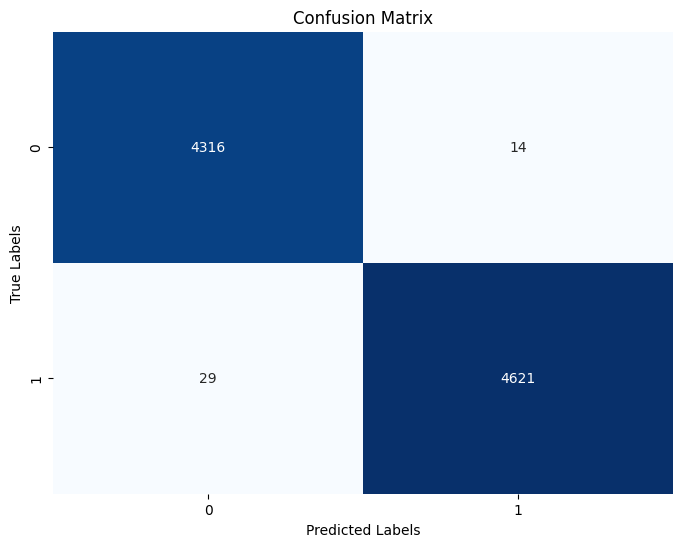

In [72]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Training the adaboost classifier

In [73]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [82]:
base_estimator = DecisionTreeClassifier(max_depth=1)

ERROR! Session/line number was not unique in database. History logging moved to new session 12


In [83]:
adaboost = AdaBoostClassifier(base_estimator=base_estimator)

In [84]:
param_grid = {
    'n_estimators': [10, 50, 100],   # Number of weak learners in the ensemble
    'learning_rate': [0.1, 0.5, 1.0], # Learning rate (weights of weak learners)
}

In [85]:
grid_search = GridSearchCV(adaboost, param_grid, cv=3, verbose=10) 

In [86]:
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3; 1/9] START learning_rate=0.1, n_estimators=10..........................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/3; 1/9] END learning_rate=0.1, n_estimators=10;, score=0.992 total time=  24.6s
[CV 2/3; 1/9] START learning_rate=0.1, n_estimators=10..........................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/3; 1/9] END learning_rate=0.1, n_estimators=10;, score=0.991 total time=  24.7s
[CV 3/3; 1/9] START learning_rate=0.1, n_estimators=10..........................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/3; 1/9] END learning_rate=0.1, n_estimators=10;, score=0.993 total time=  24.2s
[CV 1/3; 2/9] START learning_rate=0.1, n_estimators=50..........................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/3; 2/9] END learning_rate=0.1, n_estimators=50;, score=0.993 total time= 2.0min
[CV 2/3; 2/9] START learning_rate=0.1, n_estimators=50..........................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/3; 2/9] END learning_rate=0.1, n_estimators=50;, score=0.991 total time= 2.1min
[CV 3/3; 2/9] START learning_rate=0.1, n_estimators=50..........................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/3; 2/9] END learning_rate=0.1, n_estimators=50;, score=0.993 total time= 2.0min
[CV 1/3; 3/9] START learning_rate=0.1, n_estimators=100.........................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/3; 3/9] END learning_rate=0.1, n_estimators=100;, score=0.994 total time= 4.1min
[CV 2/3; 3/9] START learning_rate=0.1, n_estimators=100.........................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/3; 3/9] END learning_rate=0.1, n_estimators=100;, score=0.994 total time= 4.1min
[CV 3/3; 3/9] START learning_rate=0.1, n_estimators=100.........................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/3; 3/9] END learning_rate=0.1, n_estimators=100;, score=0.995 total time= 4.0min
[CV 1/3; 4/9] START learning_rate=0.5, n_estimators=10..........................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/3; 4/9] END learning_rate=0.5, n_estimators=10;, score=0.993 total time=  24.8s
[CV 2/3; 4/9] START learning_rate=0.5, n_estimators=10..........................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/3; 4/9] END learning_rate=0.5, n_estimators=10;, score=0.992 total time=  25.2s
[CV 3/3; 4/9] START learning_rate=0.5, n_estimators=10..........................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/3; 4/9] END learning_rate=0.5, n_estimators=10;, score=0.994 total time=  24.2s
[CV 1/3; 5/9] START learning_rate=0.5, n_estimators=50..........................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/3; 5/9] END learning_rate=0.5, n_estimators=50;, score=0.995 total time= 2.0min
[CV 2/3; 5/9] START learning_rate=0.5, n_estimators=50..........................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/3; 5/9] END learning_rate=0.5, n_estimators=50;, score=0.996 total time= 2.0min
[CV 3/3; 5/9] START learning_rate=0.5, n_estimators=50..........................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/3; 5/9] END learning_rate=0.5, n_estimators=50;, score=0.996 total time= 2.0min
[CV 1/3; 6/9] START learning_rate=0.5, n_estimators=100.........................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/3; 6/9] END learning_rate=0.5, n_estimators=100;, score=0.996 total time= 4.0min
[CV 2/3; 6/9] START learning_rate=0.5, n_estimators=100.........................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/3; 6/9] END learning_rate=0.5, n_estimators=100;, score=0.996 total time= 4.0min
[CV 3/3; 6/9] START learning_rate=0.5, n_estimators=100.........................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/3; 6/9] END learning_rate=0.5, n_estimators=100;, score=0.996 total time= 4.3min
[CV 1/3; 7/9] START learning_rate=1.0, n_estimators=10..........................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/3; 7/9] END learning_rate=1.0, n_estimators=10;, score=0.993 total time=  23.9s
[CV 2/3; 7/9] START learning_rate=1.0, n_estimators=10..........................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/3; 7/9] END learning_rate=1.0, n_estimators=10;, score=0.994 total time=  23.9s
[CV 3/3; 7/9] START learning_rate=1.0, n_estimators=10..........................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/3; 7/9] END learning_rate=1.0, n_estimators=10;, score=0.995 total time=  23.4s
[CV 1/3; 8/9] START learning_rate=1.0, n_estimators=50..........................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/3; 8/9] END learning_rate=1.0, n_estimators=50;, score=0.995 total time= 2.0min
[CV 2/3; 8/9] START learning_rate=1.0, n_estimators=50..........................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/3; 8/9] END learning_rate=1.0, n_estimators=50;, score=0.996 total time= 2.0min
[CV 3/3; 8/9] START learning_rate=1.0, n_estimators=50..........................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/3; 8/9] END learning_rate=1.0, n_estimators=50;, score=0.996 total time= 2.0min
[CV 1/3; 9/9] START learning_rate=1.0, n_estimators=100.........................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 1/3; 9/9] END learning_rate=1.0, n_estimators=100;, score=0.997 total time= 4.0min
[CV 2/3; 9/9] START learning_rate=1.0, n_estimators=100.........................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 2/3; 9/9] END learning_rate=1.0, n_estimators=100;, score=0.996 total time= 4.0min
[CV 3/3; 9/9] START learning_rate=1.0, n_estimators=100.........................


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV 3/3; 9/9] END learning_rate=1.0, n_estimators=100;, score=0.997 total time= 3.9min


C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


GridSearchCV(cv=3,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1)),
             param_grid={'learning_rate': [0.1, 0.5, 1.0],
                         'n_estimators': [10, 50, 100]},
             verbose=10)

In [87]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'learning_rate': 1.0, 'n_estimators': 100}


In [88]:
adaboost = AdaBoostClassifier(base_estimator=base_estimator, learning_rate=1, n_estimators=100)

In [89]:
adaboost.fit(x_train, y_train)

C:\Users\Zeus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=1, n_estimators=100)

In [90]:
# Make predictions on the test data
y_pred = adaboost.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.9967706013363029
Precision: 0.9976308421279345
Recall: 0.9961290322580645
F1-score: 0.996879371569999


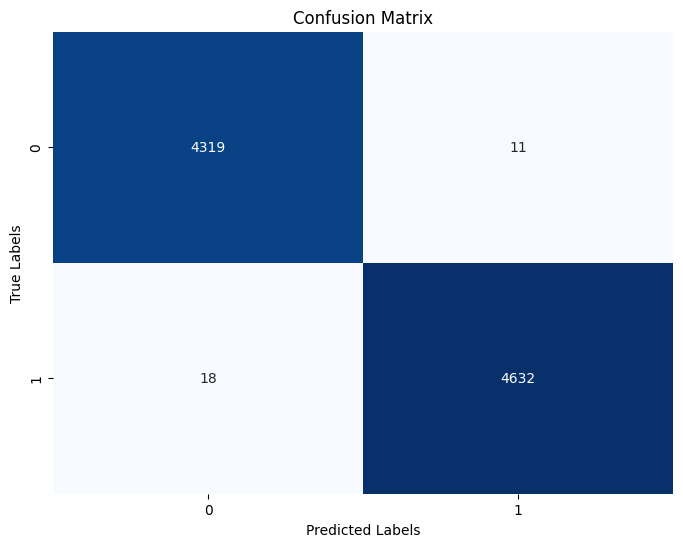

In [95]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()